# mount the GDrive in the virtual machine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls
%cd './drive/My Drive/trabajo_finmaster_peces'
!ls

!rm -rf test/
!rm -rf train/

frcnn_test_vgg.ipynb				 test
frcnn_train_vgg.ipynb				 test.csv
model						 train
model_vgg_config.pickle				 train.csv
Object_Detection_DataPreprocessing_granit.ipynb  Trained
README.md
[Errno 2] No such file or directory: './drive/My Drive/trabajo_finmaster_peces'
/content/drive/My Drive/trabajo_finmaster_peces
frcnn_test_vgg.ipynb				 test
frcnn_train_vgg.ipynb				 test.csv
model						 train
model_vgg_config.pickle				 train.csv
Object_Detection_DataPreprocessing_granit.ipynb  Trained
README.md


In [ ]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf


In [ ]:
base_path = './'

In [ ]:
#Definition of the tyoes of fiches, categories that we want to identify
classes = ['1_HYSE', '2_SEI', '3_TORSK', '4_LASK']

In [ ]:
Trained_images_path = base_path + 'Trained'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
print(base_path)
print(Trained_images_path)
print(train_path)
print(test_path)

./
.//Trained
./train
./test


In [ ]:
# Save images to train and test directory
os.mkdir(train_path)
os.mkdir(test_path)



In [ ]:
train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

for i in range(len(classes)):
    
    all_imgs = os.listdir(os.path.join(Trained_images_path, classes[i]))
    all_imgs = [f for f in all_imgs if not f.startswith('NIR')]
    random.seed(1)
    random.shuffle(all_imgs)
    
    train_imgs = all_imgs[:800]
    test_imgs = all_imgs[800:]
    
    # Copy each classes' images to train directory
    for j in range(len(train_imgs)):
        original_path = os.path.join(os.path.join(Trained_images_path, classes[i]), train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)       
        img = cv2.imread(new_path)
        height, width = img.shape[:2]
        train_df = train_df.append({'FileName': train_imgs[j], 
                                    'XMin': 0.05, 
                                    'XMax': 0.95, 
                                    'YMin': 0.05, 
                                    'YMax': 0.95, 
                                    'ClassName': classes[i]}, 
                                   ignore_index=True)
    
    # Copy each classes' images to test directory
    for j in range(len(test_imgs)):
        original_path = os.path.join(os.path.join(Trained_images_path, classes[i]), test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)
        img = cv2.imread(new_path)
        height, width = img.shape[:2]
        test_df = test_df.append({'FileName': test_imgs[j], 
                                    'XMin': 0.05, 
                                    'XMax': 0.95, 
                                    'YMin': 0.05, 
                                    'YMax': 0.95, 
                                    'ClassName': classes[i]}, 
                                   ignore_index=True)

In [ ]:
print('number of training images: ', len(os.listdir(train_path))) # subtract one because there is one hidden file named '.DS_Store'
print('number of test images: ', len(os.listdir(test_path)))

number of training images:  2223
number of test images:  3029


In [ ]:
# Generate the files with teh date needed to train and test the images
train_df.to_csv(os.path.join(base_path, 'train.csv'))
test_df.to_csv(os.path.join(base_path, 'test.csv'))

### Write train.csv to annotation.txt

In [ ]:
train_df.index

RangeIndex(start=0, stop=2224, step=1)

In [ ]:
train_df.columns

Index(['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'], dtype='object')

(553, 215)


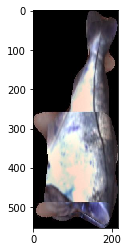

In [ ]:
Index = 10
# print(train_df.head())
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))
img = cv2.imread('train/'+train_df.loc[Index,'FileName'])
plt.imshow(img)
height, width = img.shape[:2]
# For training
print(img.shape[:2])


In [ ]:
# generate the anotation.txt file with the  regions of interest of each image
f= open("annotation.txt","w+")
for idx, row in train_df.iterrows():
#     sys.stdout.write(str(idx) + '\r')
#     sys.stdout.flush()
    print( row['FileName'])
    img = cv2.imread(('train/' + row['FileName']))

    height, width = img.shape[:2]
  
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    google_colab_file_path = 'train'
    fileName = os.path.join(google_colab_file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

RGB_63642838276284.jpg
RGB_63643987300389.jpg
RGB_63643376639640.jpg
RGB_63643969340199.jpg
RGB_63644266366698.jpg
RGB_63643459475092.jpg
RGB_63642548740205.jpg
RGB_63642132467180.jpg
RGB_63643355658493.jpg
RGB_63643486338031.jpg
RGB_63644010565675.jpg
RGB_63644200568339.jpg
RGB_63643884105240.jpg
RGB_63642132456216.jpg
RGB_63642629768251.jpg
RGB_63643400269866.jpg
RGB_63643883749801.jpg
RGB_63643903690117.jpg
RGB_63643462206819.jpg
RGB_63644267398790.jpg
RGB_63642838281058.jpg
RGB_63643987083954.jpg
RGB_63643973165361.jpg
RGB_63642630277316.jpg
RGB_63643973365446.jpg
RGB_63643986735169.jpg
RGB_63642838275969.jpg
RGB_63644343687459.jpg
RGB_63642132460027.jpg
RGB_63644011186202.jpg
RGB_63643377682953.jpg
RGB_63643883245279.jpg
RGB_63643990961562.jpg
RGB_63643905061965.jpg
RGB_63644340801907.jpg
RGB_63643376288512.jpg
RGB_63643972295785.jpg
RGB_63643483467258.jpg
RGB_63644266954346.jpg
RGB_63642132458343.jpg
RGB_63643882920829.jpg
RGB_63643358666951.jpg
RGB_63642628656443.jpg
RGB_6364283

In [ ]:
# generate the file to test the model with the test images
test_df = pd.read_csv(os.path.join(base_path, 'test.csv'))
print(test_df.head())
# For test
f= open("test_annotation.txt","w+")
for idx, row in test_df.iterrows():
    sys.stdout.write(str(idx) + '\r')
    sys.stdout.flush()
    img = cv2.imread(('test/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    google_colab_file_path = 'test'
    fileName = os.path.join(google_colab_file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

   Unnamed: 0                FileName  XMin  XMax  YMin  YMax ClassName
0           0  RGB_63643518535251.jpg  0.05  0.95  0.05  0.95   3_TORSK
1           1  RGB_63645322961017.jpg  0.05  0.95  0.05  0.95   3_TORSK
2           2  RGB_63645325686169.jpg  0.05  0.95  0.05  0.95   3_TORSK
3           3  RGB_63645373684016.jpg  0.05  0.95  0.05  0.95   3_TORSK
4           4  RGB_63643476862648.jpg  0.05  0.95  0.05  0.95   3_TORSK


test de lectura de los ficheros de imagens y boxes

In [ ]:
def get_data(input_path):
	"""Parse the data from annotation file
	
	Args:
		input_path: annotation file path

	Returns:
		all_data: list(filepath, width, height, list(bboxes))
		classes_count: dict{key:class_name, value:count_num} 
			e.g. {'Car': 2383, 'Mobile phone': 1108, 'Person': 3745}
		class_mapping: dict{key:class_name, value: idx}
			e.g. {'Car': 0, 'Mobile phone': 1, 'Person': 2}
	"""
	found_bg = False
	all_imgs = {}

	classes_count = {}

	class_mapping = {}

	visualise = True

	i = 1
	
	with open(input_path,'r') as f:

		print('Parsing annotation files')

		for line in f:

			# Print process
			sys.stdout.write('\r'+'idx=' + str(i))
			i += 1

			line_split = line.strip().split(',')

			# Make sure the info saved in annotation file matching the format (path_filename, x1, y1, x2, y2, class_name)
			# Note:
			#	One path_filename might has several classes (class_name)
			#	x1, y1, x2, y2 are the pixel value of the origial image, not the ratio value
			#	(x1, y1) top left coordinates; (x2, y2) bottom right coordinates
			#   x1,y1-------------------
			#	|						|
			#	|						|
			#	|						|
			#	|						|
			#	---------------------x2,y2

			(filename,x1,y1,x2,y2,class_name) = line_split

			if class_name not in classes_count:
				classes_count[class_name] = 1
			else:
				classes_count[class_name] += 1

			if class_name not in class_mapping:
				if class_name == 'bg' and found_bg == False:
					print('Found class name with special name bg. Will be treated as a background region (this is usually for hard negative mining).')
					found_bg = True
				class_mapping[class_name] = len(class_mapping)

			if filename not in all_imgs:
				all_imgs[filename] = {}
				
				img = cv2.imread(filename)
				(rows,cols) = img.shape[:2]
				all_imgs[filename]['filepath'] = filename
				all_imgs[filename]['width'] = cols
				all_imgs[filename]['height'] = rows
				all_imgs[filename]['bboxes'] = []
				# if np.random.randint(0,6) > 0:
				# 	all_imgs[filename]['imageset'] = 'trainval'
				# else:
				# 	all_imgs[filename]['imageset'] = 'test'

			all_imgs[filename]['bboxes'].append({'class': class_name, 'x1': int(x1), 'x2': int(x2), 'y1': int(y1), 'y2': int(y2)})


		all_data = []
		for key in all_imgs:
			all_data.append(all_imgs[key])
		
		# make sure the bg class is last in the list
		if found_bg:
			if class_mapping['bg'] != len(class_mapping) - 1:
				key_to_switch = [key for key in class_mapping.keys() if class_mapping[key] == len(class_mapping)-1][0]
				val_to_switch = class_mapping['bg']
				class_mapping['bg'] = len(class_mapping) - 1
				class_mapping[key_to_switch] = val_to_switch
		
		return all_data, classes_count, class_mapping

In [ ]:
train_path =  base_path  + './annotation.txt' # Training data (annotation file)
train_imgs, classes_count, class_mapping = get_data(train_path)

Parsing annotation files
idx=2224

In [ ]:
index = 10
for i in range(len(train_imgs)):
  if(train_imgs[i]['filepath']  == 'train/40aa67637b9fc99c.jpg'):
    index = i
    break
print(index)  

10


test de imagens de entrenamiento imagen y bbox

train/RGB_63644010565675.jpg
{'1_HYSE': 0, '2_SEI': 1, '3_TORSK': 2, '4_LASK': 3}
[{'class': '1_HYSE', 'x1': 10, 'x2': 204, 'y1': 27, 'y2': 525}]
1
(553, 215)


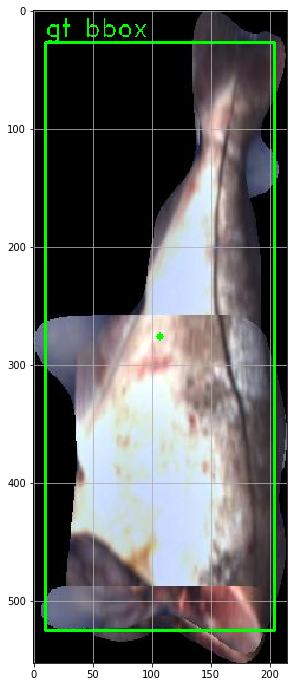

In [ ]:



Index = index
filepath = train_imgs[Index]['filepath'] 


print(filepath)
print(class_mapping)
bbox = train_imgs[Index]['bboxes']
print(bbox)
count_elemtes = len(bbox)
print(count_elemtes)
img = cv2.imread(filepath)

height, width = img.shape[:2]
# For training
print(img.shape[:2])

for i in range(count_elemtes):
  gt_x1, gt_x2 = train_imgs[Index]['bboxes'][i]['x1'], train_imgs[Index]['bboxes'][i]['x2']
  gt_y1, gt_y2 = train_imgs[Index]['bboxes'][i]['y1'], train_imgs[Index]['bboxes'][i]['y2']
  gt_x1, gt_y1, gt_x2, gt_y2 = int(gt_x1), int(gt_y1), int(gt_x2), int(gt_y2)
  color = (0, 255, 0)
  cv2.putText(img, 'gt bbox', (gt_x1, gt_y1-5), cv2.FONT_HERSHEY_DUPLEX, 0.7, color, 1)
  cv2.rectangle(img, (gt_x1, gt_y1), (gt_x2, gt_y2), color, 2)
  cv2.circle(img, (int((gt_x1+gt_x2)/2), int((gt_y1+gt_y2)/2)), 3, color, -1)

plt.figure(figsize=(12,12))
plt.grid()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()